# 03: Preprocessing

### Imported Libraries

In [1]:
import sys
print('Python version: %s' % (sys.version))

# data management
print('\nData Management Libraries')
import pandas as pd
print('\tpandas version: %s' % (pd.__version__))
import numpy as np
print('\tnumpy version: %s' % (np.__version__))
import regex as re
print('\tregex version: %s' % (re.__version__))

# visualizing
print('\nVisualization Libraries')
from matplotlib import pyplot as plt
import matplotlib
print('\tmatplotlib version: %s' % (matplotlib.__version__))
import seaborn as sns
print('\tseaborn version: %s' % (sns.__version__))


# modeling
print('\nModeling Libraries')
import imblearn
print('\timblearn version: %s' % imblearn.__version__)
import sklearn
print('\tsklearn version: %s' % sklearn.__version__)

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

Data Management Libraries
	pandas version: 1.1.3
	numpy version: 1.19.2
	regex version: 2.5.86

Visualization Libraries
	matplotlib version: 3.3.2
	seaborn version: 0.11.0

Modeling Libraries
	imblearn version: 0.7.0
	sklearn version: 0.23.2


### Import Dataframe

In [2]:
df = pd.read_csv('../data/creditcard_02.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_DayAware,Time_DayAware_byHour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2.0,0.000556


### Note: 
Since data has previously gone through a PCA transformation, it is assumed that the features transformed this way were scaled prior to the PCA transformation. In other words, the features V1-V28 are assumed to be scaled; the features 'Time' and 'Amount' are not scaled.

### Observations on Scaling Time

### Distribution of Time by Class, Raw

### Standard Scaler, Time

In [4]:
standard_scaler = sklearn.preprocessing.StandardScaler() # instantiate scaler

df['Time_StandardScaled'] = standard_scaler.fit_transform(df['Time'].values.reshape(-1,1)) # add scaled feature series to dataframe

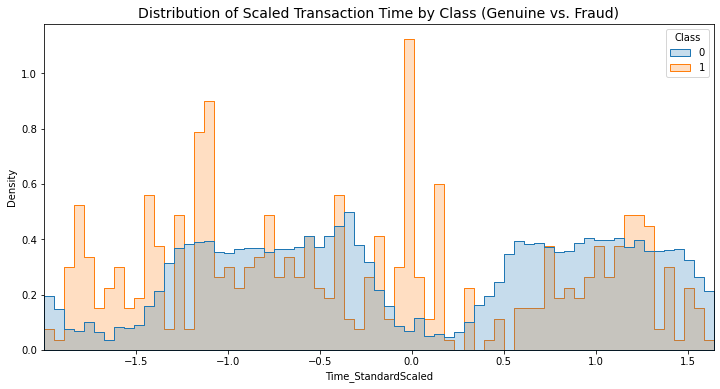

In [5]:
feature = "Time_StandardScaled"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=df, x=feature,hue="Class",stat="density",common_norm=False,element="step") # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(df[feature]), max(df[feature])]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Scaled Transaction Time by Class (Genuine vs. Fraud)', fontsize=14)
plt.axvline(86400, 0, max(df[feature]),color="r")
plt.show()

### Standard Scaler, Day-Aware Time

In [6]:
df['TimeDayAware_StandardScaled'] = standard_scaler.fit_transform(df['Time_DayAware'].values.reshape(-1,1)) # add scaled feature series to dataframe

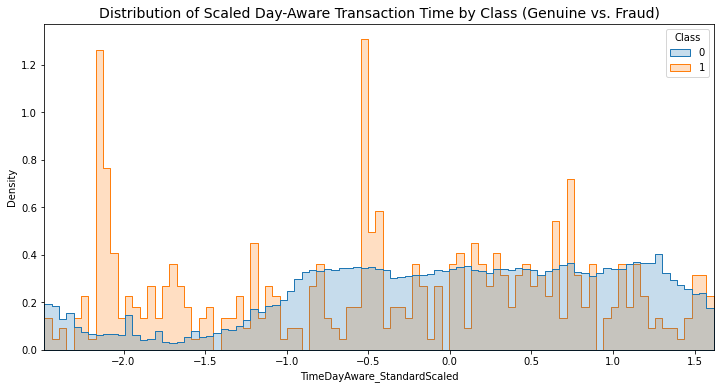

In [7]:
feature = "TimeDayAware_StandardScaled"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=df, x=feature,hue="Class",stat="density",common_norm=False,element="step") # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(df[feature]), max(df[feature])]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Scaled Day-Aware Transaction Time by Class (Genuine vs. Fraud)', fontsize=14)
plt.axvline(86400, 0, max(df[feature]),color="r")
plt.show()

### Standard Scaler, Amount

In [8]:
df['Amount_StandardScaled'] = standard_scaler.fit_transform(df['Amount'].values.reshape(-1,1)) # add scaled feature series to dataframe

### Reorder Time Feature Series

In [9]:
Time_df = df['Time']
Time_StandardScaled_df = df['Time_StandardScaled']  # save a copy of feature series
TimeDayAware_df = df['Time_DayAware']
TimeDayAware_StandardScaled_df = df['TimeDayAware_StandardScaled']  # save a copy of feature series

df.drop(['Time'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Time_StandardScaled'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Time_DayAware'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['TimeDayAware_StandardScaled'], axis=1, inplace=True)  # drop existing feature series from back of dataframe

df.insert(0, 'TimeDayAware_StandardScaled', TimeDayAware_StandardScaled_df) # readd feature series back to position 0 in dataframe
df.insert(0, 'Time_DayAware', TimeDayAware_df) # readd feature series back to position 0 in dataframe
df.insert(0, 'Time_StandardScaled', Time_StandardScaled_df) # readd feature series back to position 0 in dataframe
df.insert(0, 'Time', Time_df) # readd feature series back to position 0 in dataframe

### Reorder Amount Feature Series

In [10]:
Amount_StandardScaled_df = df['Amount_StandardScaled']  # save a copy of feature series
Amount_df = df['Amount']

df.drop(['Amount'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Amount_StandardScaled'], axis=1, inplace=True)  # drop existing feature series from back of dataframe

df.insert(0, 'Amount_StandardScaled', Amount_StandardScaled_df) # readd feature series back to position 0 in dataframe
df.insert(0, 'Amount', Amount_df) # readd feature series back to position 0 in dataframe

### Dataframe Review

In [11]:
print(df.columns)

Index(['Amount', 'Amount_StandardScaled', 'Time', 'Time_StandardScaled',
       'Time_DayAware', 'TimeDayAware_StandardScaled', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'Class', 'Time_DayAware_byHour'],
      dtype='object')


In [12]:
df.describe()

,Amount,Amount_StandardScaled,Time,Time_StandardScaled,Time_DayAware,TimeDayAware_StandardScaled,V1,V2,V3,V4,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time_DayAware_byHour
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,88.349619,3.202236e-16,94813.859575,-1.050379e-14,52336.622709,3.475116e-15,3.923752e-15,5.559442e-16,-8.769520e-15,2.759583e-15,...,1.540693e-16,7.961936e-16,5.402018e-16,4.459446e-15,1.446667e-15,1.705578e-15,-3.668456e-16,-1.203990e-16,0.001727,14.537951
std,250.120109,1.000002e+00,47488.145955,1.000002e+00,21049.420490,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,5.847061
min,0.000000,-3.532294e-01,0.000000,-1.996583e+00,0.000000,-2.486373e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,5.600000,-3.308401e-01,54201.500000,-8.552120e-01,38153.500000,-6.738023e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,10.598194
50%,22.000000,-2.652715e-01,84692.000000,-2.131453e-01,54039.000000,8.087540e-02,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,15.010833
75%,77.165000,-4.471707e-02,139320.500000,9.372174e-01,69587.000000,8.195194e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,19.329722
max,25691.160000,1.023622e+02,172792.000000,1.642058e+00,86398.000000,1.618165e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,23.999444


### Output Adjusted Dataframe

In [13]:
df.to_csv('../data/creditcard_03.csv',index=False)